In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from config import data_dir, plots_dir
data = pd.read_csv(data_dir / 'data.csv')


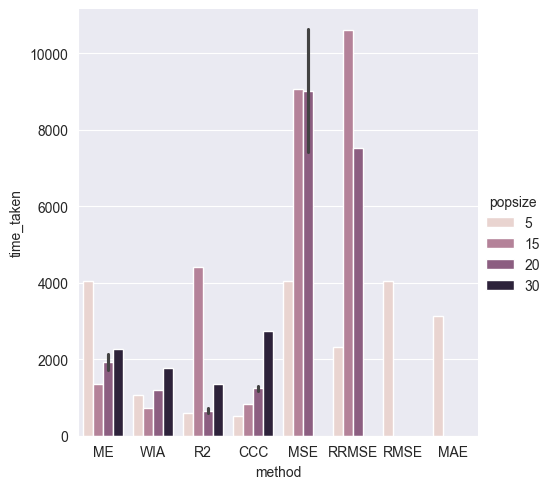

In [3]:
de=data[data['algorithm']=='de']
sns.catplot(x='method', y='time_taken',kind='bar', data=de, hue='popsize' )

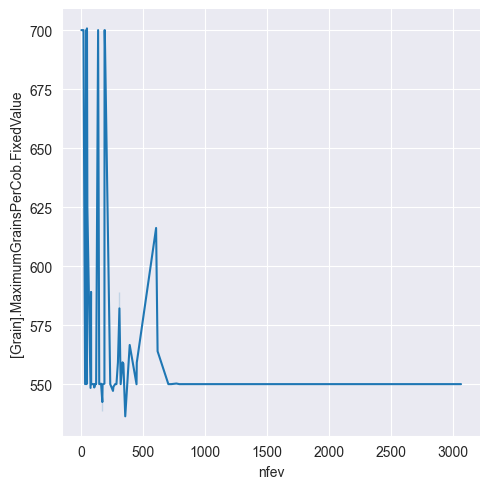

In [4]:
sns.relplot(x='nfev', y='[Grain].MaximumGrainsPerCob.FixedValue',kind='line', data=data )

Number of functional evaluations and number of functional evaluations


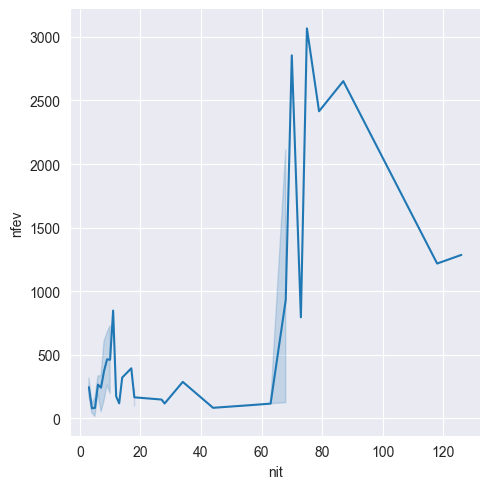

In [5]:
sns.relplot(x='nit', y='nfev',kind='line', data=data)

Number of time taken and nit


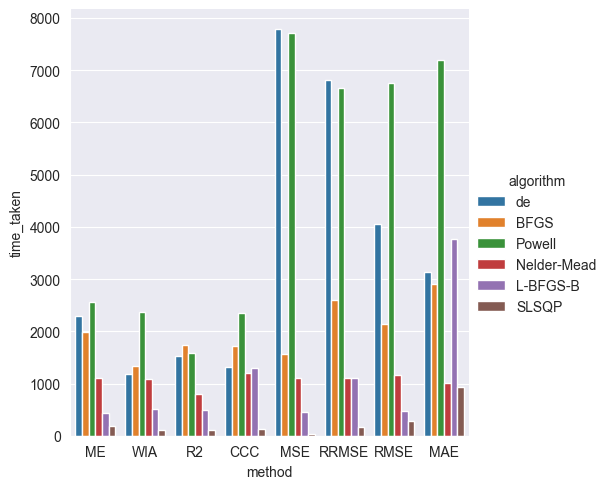

In [22]:
sns.catplot(x='method', y='time_taken',kind='bar', data=data, hue='algorithm', errorbar=None)

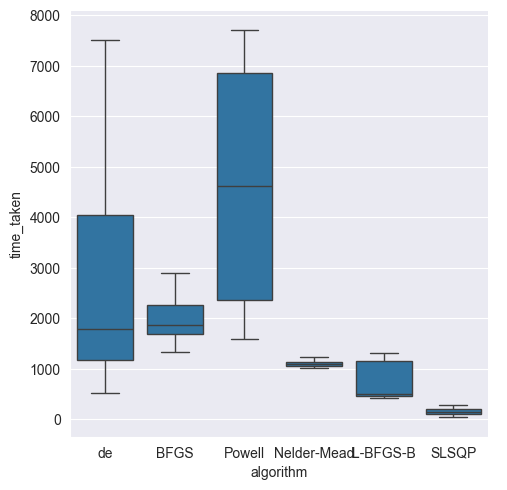

In [21]:
sns.catplot(x='algorithm', y='time_taken',kind='box', data=data,  showfliers=False)

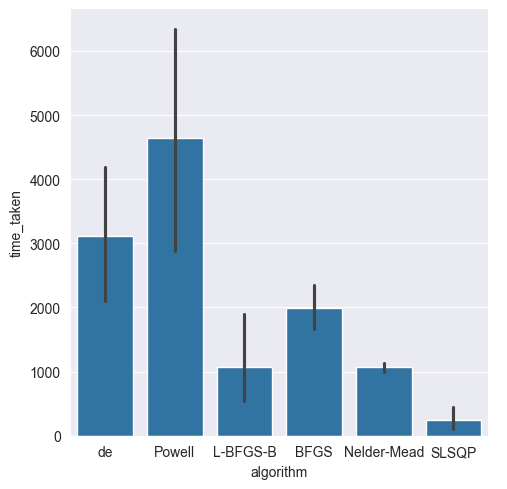

In [30]:
order = sorted(data["time_taken"])
tt_data= data.sort_values(by=['time_taken'], ascending=False)
sns.catplot(
    x="algorithm",
    y="time_taken",
    kind="bar",
    data=tt_data,
)


In [23]:
from apsimNGpy.tests.unittests.test_factory import obs

In [29]:
obs.observed.std()
obs.observed.min()
obs.observed.max() - obs.observed.min()


np.float64(8268.499)

In [31]:
from apsimNGpy.senstivity.sensitivity import run_sensitivity, ConfigProblem

if __name__ == "__main__":
    params = {
        ".Simulations.Simulation.Field.Sow using a variable rule?Population": (2, 10),
         ".Simulations.Simulation.Field.Fertilise at sowing?Amount": (0, 300),
        ".Simulations.Simulation.Field.Maize.CultivarFolder.Dekalb_XL82@[Phenology].GrainFilling.Target.FixedValue": (400, 850),
        ".Simulations.Simulation.Field.Maize.CultivarFolder.Dekalb_XL82?[Leaf].Photosynthesis.RUE.FixedValue": (
            1.2, 2.2),
    }
    runner = ConfigProblem(
        base_model="Maize",
        params=params,
        outputs=["Yield", "Maize.AboveGround.N"],
    )

In [37]:
Si_morris = run_sensitivity(
        runner,
        method="morris", n_cores=10,
    N=100,
        sample_options={
            'seed': 42,
            "num_levels": 20,
            "optimal_trajectories": 40,
        },
        analyze_options={
            'conf_level': 0.95,
            "num_resamples": 1000,
            "print_to_console": True,
            'seed': 42
        },
    )

APSIM running[0f] ██████████ 100% (200/200) >> completed (elapsed=>05:38, eta=>00:00) , (1.6923 s/sim or 0.591 sim/s) 


loading simulated results.
                                                      mu       mu_star  \
Population                                   9986.797800  12386.792121   
Amount                                      15087.536044  15924.581696   
[Phenology].GrainFilling.Target.FixedValue  -1017.732176   1431.821886   
[Leaf].Photosynthesis.RUE.FixedValue        13871.652528  14349.312675   

                                                   sigma  mu_star_conf  
Population                                  15492.300309   4126.534810  
Amount                                      21524.312553   6215.475239  
[Phenology].GrainFilling.Target.FixedValue   1445.134282    292.515103  
[Leaf].Photosynthesis.RUE.FixedValue        12971.174277   3889.060872  
                                                   mu    mu_star      sigma  \
Population                                  25.403539  27.538365  29.454524   
Amount                                      42.721175  42.887000  51.464416   
